In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f = lambda x: x**2 - 15*x + 1
df = lambda x: 2*x - 15
ddf = lambda x: 2

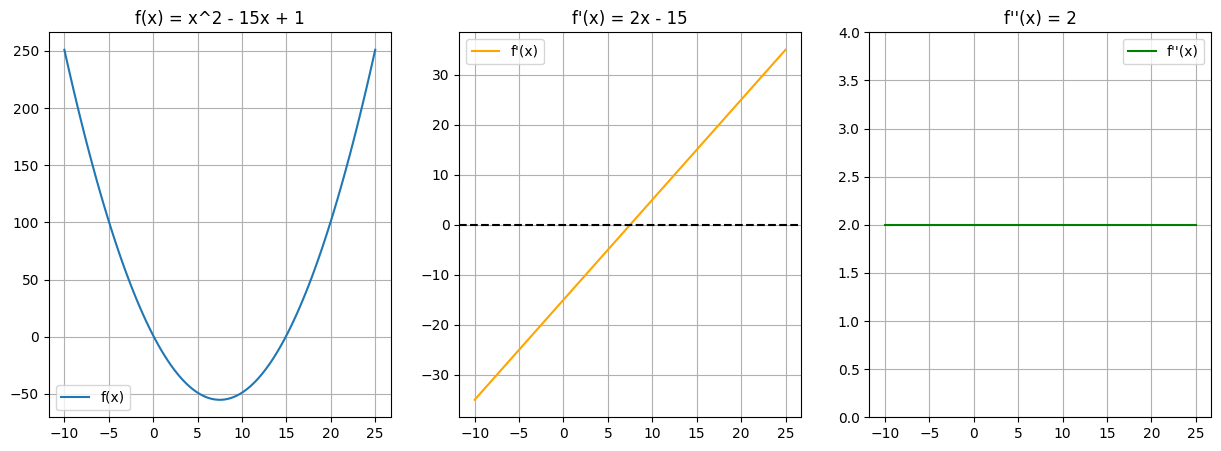

In [3]:
x_vals = np.linspace(-10, 25, 100)

plt.figure(figsize=(15, 5))

# Plot f(x)
plt.subplot(1, 3, 1)
plt.plot(x_vals, [f(x) for x in x_vals], label='f(x)')
plt.title('f(x) = x^2 - 15x + 1')
plt.grid(True)
plt.legend()

# Plot f'(x)
plt.subplot(1, 3, 2)
plt.plot(x_vals, [df(x) for x in x_vals], label="f'(x)", color='orange')
plt.axhline(0, color='black', linestyle='--') # Root line
plt.title("f'(x) = 2x - 15")
plt.grid(True)
plt.legend()

# Plot f''(x)
plt.subplot(1, 3, 3)
plt.plot(x_vals, [ddf(x) for x in x_vals], label="f''(x)", color='green')
plt.title("f''(x) = 2")
plt.ylim(0, 4)
plt.grid(True)
plt.legend()

plt.show()

In [4]:
def single_variable_gradient_descent(x0, learning_rate, epsilon, max_iter=1000):
    x = x0
    for i in range(max_iter):
        grad = df(x)
        
        if abs(grad) < epsilon:
            print(f"Converged at iteration {i}")
            break
            
        x -= learning_rate * grad
        
    return x, grad

In [5]:
def single_variable_newtons_method(x0, learning_rate=1.0, epsilon=0.1, max_iter=1000):
    x = x0
    
    for i in range(max_iter):
        grad = df(x)
        hess = ddf(x)
        

        if abs(grad) < epsilon:
            print(f"Converged at iteration {i}")
            break
        
        # Newton update: x_new = x - alpha * (f'(x) / f''(x))
        if hess == 0:
            print("Hessian is zero. Cannot divide.")
            break
            
        x = x - learning_rate * (grad / hess)
        
    return x, grad

In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [6]:
x_opt, grad_opt = single_variable_gradient_descent(x0=40, learning_rate=0.01, epsilon=0.1)
print(f"\nOptimum x: {x_opt:.6f}, Gradient: {grad_opt:.6f}")

Converged at iteration 321

Optimum x: 7.549597, Gradient: 0.099194


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [7]:
x_opt, grad_opt = single_variable_newtons_method(x0=40, learning_rate=1.0, epsilon=0.1)
print(f"\nOptimum x: {x_opt:.6f}, Gradient: {grad_opt:.6f}")

Converged at iteration 1

Optimum x: 7.500000, Gradient: 0.000000


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


In [8]:
x_opt, grad_opt = single_variable_newtons_method(x0=40, learning_rate=.8, epsilon=0.1)
print(f"\nOptimum x: {x_opt:.6f}, Gradient: {grad_opt:.6f}")

Converged at iteration 5

Optimum x: 7.510400, Gradient: 0.020800


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [9]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

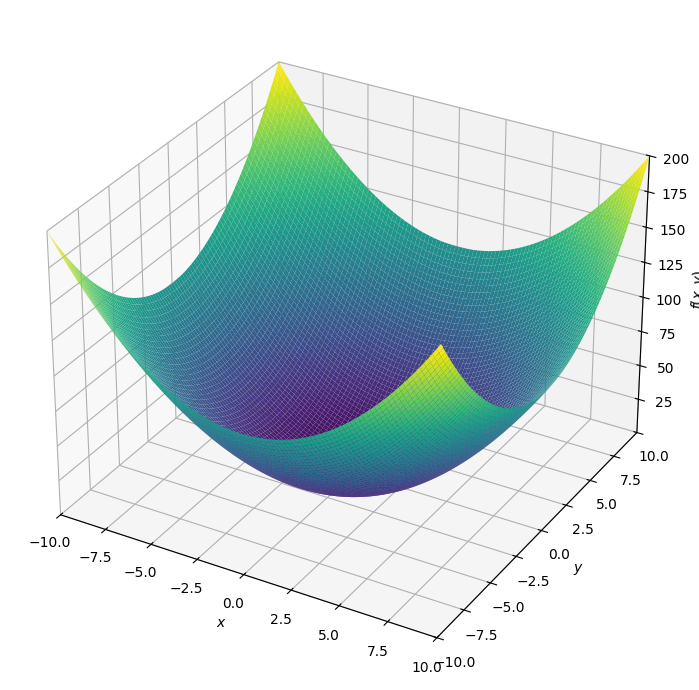

In [10]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

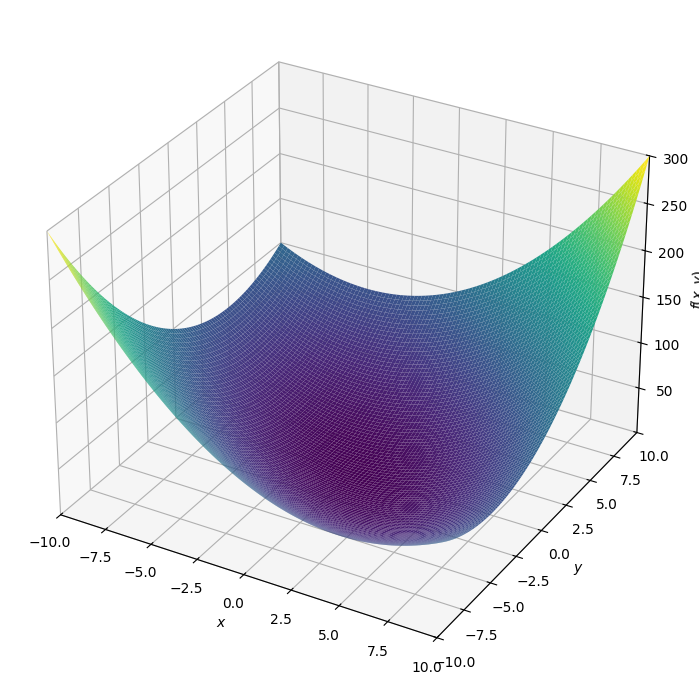

In [11]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

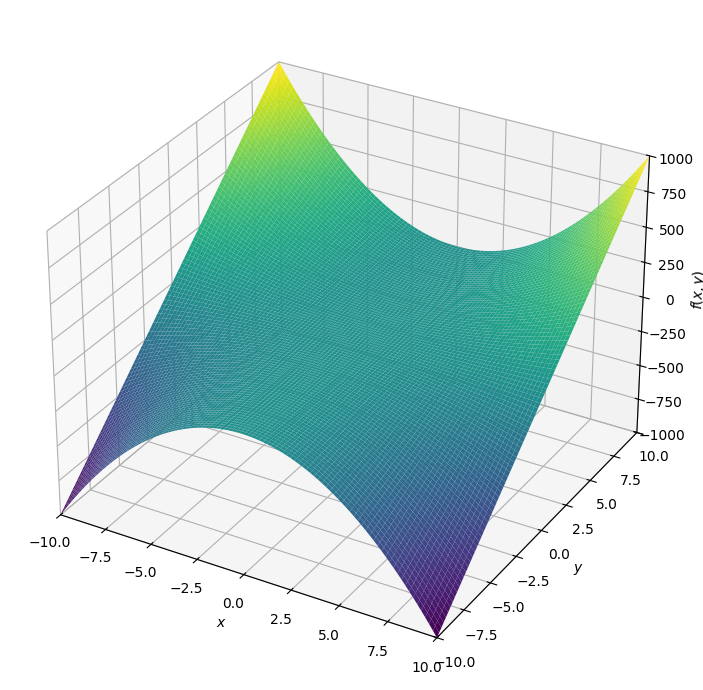

In [12]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [13]:
# f1
f1 = lambda x: x[0]**2 + x[1]**2
grad_f1 = lambda x: np.array([2*x[0], 2*x[1]])
hess_f1 = lambda x: np.array([[2, 0], [0, 2]])
######################################################################3
# f2
f2 = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2
grad_f2 = lambda x: np.array([2*x[0] + x[1], x[0] + 2*x[1]])
hess_f2 = lambda x: np.array([[2, 1], [1, 2]])
######################################################################3
# f3
f3 = lambda x: (x[0]**2) * x[1]
grad_f3 = lambda x: np.array([2*x[0]*x[1], x[0]**2])
hess_f3 = lambda x: np.array([[2*x[1], 2*x[0]], [2*x[0], 0]])


In [14]:
def multivar_gradient_descent(func, grad_func, x0, learning_rate, epsilon, max_iter=1000):
    x = np.array(x0, dtype=float)
    print(f"Starting GD at {x}")
    
    for i in range(max_iter):
        grad = grad_func(x)
        if np.linalg.norm(grad) < epsilon:
            print(f"Converged at iteration {i}")
            break
            
        x -= learning_rate * grad
        
    return x, grad

In [15]:
def multivar_newtons_method(func, grad_func, hess_func, x0, learning_rate=1.0, epsilon=0.001, max_iter=1000):
    x = np.array(x0, dtype=float)
    print(f"Starting Newton at {x}")
    
    for i in range(max_iter):
        grad = grad_func(x)
        H = hess_func(x)
        
        if np.linalg.norm(grad) < epsilon:
            print(f"Converged at iteration {i}")
            break
            
        # hopign it has an inverse
        H_inv = np.linalg.inv(H)
        update = H_inv @ grad
            
        x -= learning_rate * update
        
    return x, grad

In [59]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min =
 [[0.00034845]
 [0.00034845]]
Gradient =
 [[0.0006969]
 [0.0006969]]


In [20]:
x_opt, g_opt = multivar_gradient_descent(f1, grad_f1, [10, 10], 0.1, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting GD at [10. 10.]
Converged at iteration 46

 xy_min = [0.00034845 0.00034845], 

 Gradient = [0.0006969 0.0006969] 



In [60]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [21]:
x_opt, g_opt = multivar_gradient_descent(f1, grad_f1, [10, 10], 0.5, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting GD at [10. 10.]
Converged at iteration 1

 xy_min = [0. 0.], 

 Gradient = [0. 0.] 



In [61]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [22]:
x_opt, g_opt = multivar_newtons_method(f1, grad_f1, hess_f1, [10, 10], 1.0, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting Newton at [10. 10.]
Converged at iteration 1

 xy_min = [0. 0.], 

 Gradient = [0. 0.] 



In [62]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001



Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


In [23]:
x_opt, g_opt = multivar_newtons_method(f1, grad_f1, hess_f1, [10, 10], 0.5, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting Newton at [10. 10.]
Converged at iteration 15

 xy_min = [0.00030518 0.00030518], 

 Gradient = [0.00061035 0.00061035] 



In [63]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [26]:
x_opt, g_opt = multivar_gradient_descent (f2, grad_f2, [10, 10], 0.5, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting GD at [10. 10.]
Converged at iteration 16

 xy_min = [0.00015259 0.00015259], 

 Gradient = [0.00045776 0.00045776] 



In [64]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [30]:
x_opt, g_opt = multivar_newtons_method(f2, grad_f2, hess_f2, [10, 10], 1, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting Newton at [10. 10.]
Converged at iteration 1

 xy_min = [1.77635684e-15 0.00000000e+00], 

 Gradient = [3.55271368e-15 1.77635684e-15] 



In [65]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]


In [31]:
x_opt, g_opt = multivar_newtons_method(f2, grad_f2, hess_f2, [10, 10], .9, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting Newton at [10. 10.]
Converged at iteration 5

 xy_min = [0.0001 0.0001], 

 Gradient = [0.0003 0.0003] 



In [67]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [32]:
x_opt, g_opt = multivar_gradient_descent (f3, grad_f3, [10, 10], 0.01, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting GD at [10. 10.]
Converged at iteration 79

 xy_min = [6.80598421e-05 6.85061189e+00], 

 Gradient = [9.32503127e-04 4.63214210e-09] 



In [68]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]


In [33]:
x_opt, g_opt = multivar_newtons_method(f3, grad_f3, hess_f3, [10, 10], 1, 0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

Starting Newton at [10. 10.]
Converged at iteration 9

 xy_min = [0.01953125 0.01953125], 

 Gradient = [0.00076294 0.00038147] 



## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [58]:
def bfgs_optimization(func, grad_func, x_prev, x_curr, learning_rate=1.0, epsilon=0.001, max_iter=1000):
    """
    BFGS Implementation.
    Requires two initial points to estimate the initial curvature, 
    or we manually initialize B_inv (Hessian Inverse approximation).
    Here we follow the prompt requirements: xk-1 and x0 provided.
    """
    # Using numpy arrays
    x_k_minus_1 = np.array(x_prev, dtype=float)
    x_k = np.array(x_curr, dtype=float)
    dim = len(x_k)
    I = np.eye(dim)
    
    dx_0 = x_k - x_k_minus_1
    y_0 = grad_func(x_k) - grad_func(x_k_minus_1)
    # Check if we can safely divide (avoid division by zero)
    if np.dot(y_0, dx_0) > 1e-10:
        # Use these to initialize B_inv better than just 'Identity'
        # (A common trick is to scale the Identity matrix based on these)
        scale = np.dot(y_0, dx_0) / np.dot(y_0, y_0)
        B_inv = scale * I
    else:
        B_inv = I

    print('x_k-1', x_k_minus_1, 'x_k', x_k, 'B_inv', B_inv)
    print()
    # we need (grad_vector_at_k) to get (delta_x)  using-> secant method/quasi Newton
        # update (grad_vector_at_k) after (B_inv) calculations
    # we need (delta_x) to get (x_k_plus_1)        using-> Basic GD
    # we need (x_k_plus_1) to get (grad_k_plus_1)  using-> Analytical 1st derivative
        # update (x_k_plus_1) after (B_inv) calculations
    # we need (grad_k_plus_1) to get (y_k)         using-> y_k's Definition is the difference in 1st gradients
    # we need (y_k) to get many terms in (B_inve)  using-> BFGS
    grad_vector_at_k = grad_func(x_k)
    
    for i in range(max_iter):
        if np.linalg.norm(grad_vector_at_k) < epsilon:
            print(f"Converged at iteration {i}")
            print('np.linalg.norm(grad_vector_at_k)', np.linalg.norm(grad_vector_at_k))
            print()
            break
            
        # we need (delta_x) to get (x_k_plus_1)        using-> Basic GD
        # we need (x_k_plus_1) to get (grad_k_plus_1)  using-> Analytical 1st derivative
            # update (x_k_plus_1) after (B_inv) calculations
        # we need (grad_k_plus_1) to get (y_k)         using-> y_k's Definition is the difference in 1st gradients
        # we need (y_k) to get many terms in (B_inve)  using-> BFGS
        delta_x = -B_inv @ grad_vector_at_k
        
        # we need (x_k_plus_1) to get (grad_k_plus_1)  using-> Analytical 1st derivative
            # update (x_k_plus_1) after (B_inv) calculations
        # we need (grad_k_plus_1) to get (y_k)         using-> y_k's Definition is the difference in 1st gradients
        # we need (y_k) to get many terms in (B_inve)  using-> BFGS
        x_k_plus_1 = x_k + learning_rate * delta_x

        print('x_k', x_k, 'x_k+1', x_k_plus_1, 'grad x_k', grad_func(x_k), 'grad x_k1', grad_func(x_k_plus_1))
        print('np.linalg.norm(grad_vector_at_k)', np.linalg.norm(grad_vector_at_k))
        print()
        # we need (grad_k_plus_1) to get (y_k)         using-> y_k's Definition is the difference in 1st gradients
        # we need (y_k) to get many terms in (B_inve)  using-> BFGS
        grad_k_plus_1 = grad_func(x_k_plus_1)
        y_k = grad_k_plus_1 - grad_vector_at_k
        
        # Now, BFGS, (B_inv) Calculations
        # the denominator -> check devision by ZERO
        delta_x_modified_with_LR = learning_rate * delta_x
        rho_denominator = y_k.T @ delta_x_modified_with_LR
        if abs(rho_denominator) < 1e-8:
            # If curvature condition not met, reset B_inv or skip update
             B_inv = I
        else:
            rho = 1.0 / rho_denominator
            
            # The BFGS Formula
            # Reshape for matrix multiplication (column vectors)!!!!!!!!!!!1
            delta_x_modified_with_LR = delta_x_modified_with_LR.reshape(-1, 1)
            y_k = y_k.reshape(-1, 1)
            
            term1 = I - rho * (delta_x_modified_with_LR @ y_k.T)
            term2 = I - rho * (y_k @ delta_x_modified_with_LR.T)
            term3 = rho * (delta_x_modified_with_LR @ delta_x_modified_with_LR.T)
            
            B_inv = (term1 @ B_inv @ term2) + term3

        print('B_inv ', B_inv)
        print()
            
        # Move to next step
        x_k = x_k_plus_1
        grad_vector_at_k = grad_k_plus_1
        
        # Squeeze dimensions back for next iteration checks
        x_k = x_k.flatten()
        grad_vector_at_k = grad_vector_at_k.flatten()
        
    return x_k, grad_vector_at_k

In [72]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [59]:
x_opt, g_opt = bfgs_optimization(f1, grad_f1, x_prev=[10,10], x_curr=[9,9], epsilon=0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

x_k-1 [10. 10.] x_k [9. 9.] B_inv [[0.5 0. ]
 [0.  0.5]]

x_k [9. 9.] x_k+1 [0. 0.] grad x_k [18. 18.] grad x_k1 [0. 0.]
np.linalg.norm(grad_vector_at_k) 25.45584412271571

B_inv  [[0.5 0. ]
 [0.  0.5]]

Converged at iteration 1
np.linalg.norm(grad_vector_at_k) 0.0


 xy_min = [0. 0.], 

 Gradient = [0. 0.] 



In [73]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [60]:
x_opt, g_opt = bfgs_optimization(f1, grad_f1, x_prev=[10,10], x_curr=[9,9], epsilon=0.001, learning_rate=0.9)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

x_k-1 [10. 10.] x_k [9. 9.] B_inv [[0.5 0. ]
 [0.  0.5]]

x_k [9. 9.] x_k+1 [0.9 0.9] grad x_k [18. 18.] grad x_k1 [1.8 1.8]
np.linalg.norm(grad_vector_at_k) 25.45584412271571

B_inv  [[0.5 0. ]
 [0.  0.5]]

x_k [0.9 0.9] x_k+1 [0.09 0.09] grad x_k [1.8 1.8] grad x_k1 [0.18 0.18]
np.linalg.norm(grad_vector_at_k) 2.545584412271572

B_inv  [[0.5 0. ]
 [0.  0.5]]

x_k [0.09 0.09] x_k+1 [0.009 0.009] grad x_k [0.18 0.18] grad x_k1 [0.018 0.018]
np.linalg.norm(grad_vector_at_k) 0.25455844122715704

B_inv  [[0.5 0. ]
 [0.  0.5]]

x_k [0.009 0.009] x_k+1 [0.0009 0.0009] grad x_k [0.018 0.018] grad x_k1 [0.0018 0.0018]
np.linalg.norm(grad_vector_at_k) 0.025455844122715694

B_inv  [[0.5 0. ]
 [0.  0.5]]

x_k [0.0009 0.0009] x_k+1 [9.e-05 9.e-05] grad x_k [0.0018 0.0018] grad x_k1 [0.00018 0.00018]
np.linalg.norm(grad_vector_at_k) 0.0025455844122715702

B_inv  [[0.5 0. ]
 [0.  0.5]]

Converged at iteration 5
np.linalg.norm(grad_vector_at_k) 0.00025455844122715686


 xy_min = [9.e-05 9.e-05], 

 

In [74]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [61]:
x_opt, g_opt = bfgs_optimization(f2, grad_f2, x_prev=[10,10], x_curr=[9,9], epsilon=0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

x_k-1 [10. 10.] x_k [9. 9.] B_inv [[0.33333333 0.        ]
 [0.         0.33333333]]

x_k [9. 9.] x_k+1 [0. 0.] grad x_k [27. 27.] grad x_k1 [0. 0.]
np.linalg.norm(grad_vector_at_k) 38.18376618407357

B_inv  [[3.33333333e-01 2.77555756e-17]
 [2.77555756e-17 3.33333333e-01]]

Converged at iteration 1
np.linalg.norm(grad_vector_at_k) 0.0


 xy_min = [0. 0.], 

 Gradient = [0. 0.] 



In [75]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [66]:
"""

xn_1 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0027]
 [0.0027]]
Dfxn
 [[0.00027]
 [0.00027]]
0.00038183766184073667
*****
Found solution after 6 iterations.
xy_min =
 [[9.e-05]
 [9.e-05]]
Gradient =
 [[0.00027]
 [0.00027]]
"""

'\n\nxn_1 [[10.]\n [10.]]\nxn\n: [[9.]\n [9.]]\nDfxn_1\n [[30.]\n [30.]]\nDfxn\n [[27.]\n [27.]]\n38.18376618407357\n*****\nB_inv\n [[ 0.66666667 -0.33333333]\n [-0.33333333  0.66666667]]\n****************\nxn_1:\n [[9.]\n [9.]]\nxn\n: [[0.9]\n [0.9]]\nDfxn_1\n [[27.]\n [27.]]\nDfxn\n [[2.7]\n [2.7]]\n3.8183766184073655\n*****\nB_inv\n [[ 0.66666667 -0.33333333]\n [-0.33333333  0.66666667]]\n****************\nxn_1:\n [[0.9]\n [0.9]]\nxn\n: [[0.09]\n [0.09]]\nDfxn_1\n [[2.7]\n [2.7]]\nDfxn\n [[0.27]\n [0.27]]\n0.38183766184073553\n*****\nB_inv\n [[ 0.66666667 -0.33333333]\n [-0.33333333  0.66666667]]\n****************\nxn_1:\n [[0.09]\n [0.09]]\nxn\n: [[0.009]\n [0.009]]\nDfxn_1\n [[0.27]\n [0.27]]\nDfxn\n [[0.027]\n [0.027]]\n0.038183766184073605\n*****\nB_inv\n [[ 0.66666667 -0.33333333]\n [-0.33333333  0.66666667]]\n****************\nxn_1:\n [[0.009]\n [0.009]]\nxn\n: [[0.0009]\n [0.0009]]\nDfxn_1\n [[0.027]\n [0.027]]\nDfxn\n [[0.0027]\n [0.0027]]\n0.003818376618407363\n*****\nB_inv

In [63]:
x_opt, g_opt = bfgs_optimization(f2, grad_f2, x_prev=[10,10], x_curr=[9,9], epsilon=0.001, learning_rate=0.9)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

x_k-1 [10. 10.] x_k [9. 9.] B_inv [[0.33333333 0.        ]
 [0.         0.33333333]]

x_k [9. 9.] x_k+1 [0.9 0.9] grad x_k [27. 27.] grad x_k1 [2.7 2.7]
np.linalg.norm(grad_vector_at_k) 38.18376618407357

B_inv  [[3.33333333e-01 5.55111512e-17]
 [5.55111512e-17 3.33333333e-01]]

x_k [0.9 0.9] x_k+1 [0.09 0.09] grad x_k [2.7 2.7] grad x_k1 [0.27 0.27]
np.linalg.norm(grad_vector_at_k) 3.818376618407358

B_inv  [[3.33333333e-01 2.77555756e-17]
 [2.77555756e-17 3.33333333e-01]]

x_k [0.09 0.09] x_k+1 [0.009 0.009] grad x_k [0.27 0.27] grad x_k1 [0.027 0.027]
np.linalg.norm(grad_vector_at_k) 0.38183766184073553

B_inv  [[3.33333333e-01 2.77555756e-17]
 [2.77555756e-17 3.33333333e-01]]

x_k [0.009 0.009] x_k+1 [0.0009 0.0009] grad x_k [0.027 0.027] grad x_k1 [0.0027 0.0027]
np.linalg.norm(grad_vector_at_k) 0.03818376618407357

B_inv  [[3.33333333e-01 5.55111512e-17]
 [5.55111512e-17 3.33333333e-01]]

x_k [0.0009 0.0009] x_k+1 [9.e-05 9.e-05] grad x_k [0.0027 0.0027] grad x_k1 [0.00027 0.0002

In [76]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332

In [67]:
x_opt, g_opt = bfgs_optimization(f3, grad_f3, x_prev=[10,10], x_curr=[9,9], epsilon=0.001)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

x_k-1 [10. 10.] x_k [9. 9.] B_inv [[0.03157895 0.        ]
 [0.         0.03157895]]

x_k [9. 9.] x_k+1 [3.88421053 6.44210526] grad x_k [162.  81.] grad x_k1 [50.04498615 15.08709141]
np.linalg.norm(grad_vector_at_k) 181.12150617748296

B_inv  [[0.0434695  0.00378016]
 [0.00378016 0.03238647]]

x_k [3.88421053 6.44210526] x_k+1 [1.65174857 5.76430942] grad x_k [50.04498615 15.08709141] grad x_k1 [19.04237965  2.72827333]
np.linalg.norm(grad_vector_at_k) 52.26969452759934

B_inv  [[0.06854627 0.00868602]
 [0.00868602 0.03305386]]

x_k [1.65174857 5.76430942] x_k+1 [0.32276664 5.50872699] grad x_k [19.04237965  2.72827333] grad x_k1 [3.55606659 0.1041783 ]
np.linalg.norm(grad_vector_at_k) 19.236831809489942

B_inv  [[0.08397669 0.01085806]
 [0.01085806 0.0333186 ]]

x_k [0.32276664 5.50872699] x_k+1 [0.02300875 5.46664394] grad x_k [3.55606659 0.1041783 ] grad x_k1 [0.25156132 0.0005294 ]
np.linalg.norm(grad_vector_at_k) 3.5575922618527756

B_inv  [[0.09034532 0.01168662]
 [0.01168662 0

In [69]:
x_opt, g_opt = bfgs_optimization(f3, grad_f3, x_prev=[10,10], x_curr=[9,9], epsilon=0.001, learning_rate= 0.7)
print(f"\n xy_min = {x_opt}, \n\n Gradient = {g_opt} \n")

x_k-1 [10. 10.] x_k [9. 9.] B_inv [[0.03157895 0.        ]
 [0.         0.03157895]]

x_k [9. 9.] x_k+1 [5.41894737 7.20947368] grad x_k [162.  81.] grad x_k1 [78.1355169  29.36499058]
np.linalg.norm(grad_vector_at_k) 181.12150617748296

B_inv  [[0.04139775 0.00211584]
 [0.00211584 0.03124009]]

x_k [5.41894737 7.20947368] x_k+1 [3.11121085 6.45159253] grad x_k [78.1355169  29.36499058] grad x_k1 [40.14452936  9.67963295]
np.linalg.norm(grad_vector_at_k) 83.47132245690699

B_inv  [[0.05863923 0.00406263]
 [0.00406263 0.03065924]]

x_k [3.11121085 6.45159253] x_k+1 [1.43585252 6.12968891] grad x_k [40.14452936  9.67963295] grad x_k1 [17.60265849  2.06167245]
np.linalg.norm(grad_vector_at_k) 41.295018241547595

B_inv  [[0.07293869 0.00409345]
 [0.00409345 0.03014318]]

x_k [1.43585252 6.12968891] x_k+1 [0.53120455 6.0357482 ] grad x_k [17.60265849  2.06167245] grad x_k1 [6.4124338  0.28217827]
np.linalg.norm(grad_vector_at_k) 17.722981670212803

B_inv  [[0.08026555 0.00362935]
 [0.003629